# Mynt Advanced Analytics Project for Senior ML Engineers - Chor Eduarte

#### change logs: 
*    mk01:
    * basic 
*    mk02:  
    * add table of contents
    * parse date
    * preprocessing
* mk03: creating models
    * Neural net
    * Decision Trees
    * XGBoost
* mk04: improving the model by adding features
    * merging sales and train dataset
* mk07:
    * XGBoost n_estimators=2000
    
  

### Table of Contents <a class="anchor" id="toc"></a>

* [Problem Definition](#problemDefinition)
* [Reading the data](#readingTheData)
* [Data Exploration and Visualization](#EDA)
* [Data Pre-processing](#preprocessing)
* [Data Partition](#dataPartition)
* [Fit Model](#fitModel)
    * [Neural Network](#neural)
    * [Random Forest](#randomForest)
    * [XGBoost](#xgboost)
* [Model Evaluation](#modelEvaluation)

## Problem Definition
* [back to toc](#toc)

Rossmann is Germany's second-largest drug store chain. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column. Note that some stores in the dataset were temporarily closed for refurbishment

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

## Reading the data <a class="anchor" id="readingTheData"></a>
* [back to toc](#toc)

In [2]:
dataset = pd.read_csv('./dataset/train.csv',parse_dates=[2])
df_store = pd.read_csv('./dataset/store.csv')

C:\Users\reved\AppData\Local\Temp\ipykernel_19192\3423031158.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('./dataset/train.csv',parse_dates=[2])


In [3]:
dataset

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,2015-04-30,6228,650,1,1,0,0
1,2,4,2015-04-30,6884,716,1,1,0,0
2,3,4,2015-04-30,9971,979,1,1,0,0
3,4,4,2015-04-30,16106,1854,1,1,0,0
4,5,4,2015-04-30,6598,729,1,1,0,0
...,...,...,...,...,...,...,...,...,...
914624,1111,2,2013-01-01,0,0,0,0,a,1
914625,1112,2,2013-01-01,0,0,0,0,a,1
914626,1113,2,2013-01-01,0,0,0,0,a,1
914627,1114,2,2013-01-01,0,0,0,0,a,1


In [4]:
df_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


## DATA EXPLORATION AND VISUALIZATION <a class="anchor" id="EDA"></a>
* [back to toc](#toc)

In [5]:
dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,2015-04-30,6228,650,1,1,0,0
1,2,4,2015-04-30,6884,716,1,1,0,0
2,3,4,2015-04-30,9971,979,1,1,0,0
3,4,4,2015-04-30,16106,1854,1,1,0,0
4,5,4,2015-04-30,6598,729,1,1,0,0


In [6]:
dataset.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
914624,1111,2,2013-01-01,0,0,0,0,a,1
914625,1112,2,2013-01-01,0,0,0,0,a,1
914626,1113,2,2013-01-01,0,0,0,0,a,1
914627,1114,2,2013-01-01,0,0,0,0,a,1
914628,1115,2,2013-01-01,0,0,0,0,a,1


In [7]:
dataset.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [8]:
#check for null values
dataset.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Luckily we do not have null values in our dataset :)

In [9]:
#check the correlation for the data
dataset.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,1.000000,-0.000008,0.005667,0.024734,-0.000129,0.000068,0.000041
DayOfWeek,-0.000008,1.000000,-0.461340,-0.386934,-0.530936,-0.393894,-0.205699
Sales,0.005667,-0.461340,1.000000,0.896073,0.675924,0.454348,0.076103
Customers,0.024734,-0.386934,0.896073,1.000000,0.615638,0.318701,0.064592
Open,-0.000129,-0.530936,0.675924,0.615638,1.000000,0.297299,0.075490
Promo,0.000068,-0.393894,0.454348,0.318701,0.297299,1.000000,0.055323
SchoolHoliday,0.000041,-0.205699,0.076103,0.064592,0.075490,0.055323,1.000000


<AxesSubplot:>

<Figure size 1440x1872 with 0 Axes>

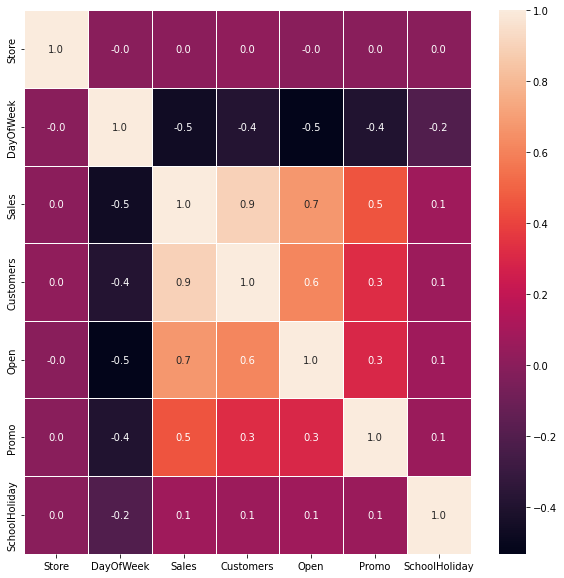

In [10]:
fig = plt.figure(figsize=(20,26))

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(dataset.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

We can see in our heatmap that <b>Sales</b> is directly proportional with <b>Customers</b> with 0.9 score. Next is <b>Open</b>, with 0.7.

Another notable correlation is <b>Promo</b> which is likely to increase <b>Sales</b>

In [11]:
dataset.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,914629.000000,914629.000000,914629.000000,914629.000000,914629.000000,914629.000000,914629.000000
mean,558.477923,3.996935,5755.722525,634.081021,0.830830,0.380417,0.180269
std,321.912653,1.998012,3842.448149,464.756658,0.374902,0.485489,0.384411
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,3711.000000,404.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5715.000000,609.000000,1.000000,0.000000,0.000000
75%,838.000000,6.000000,7826.000000,839.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,38722.000000,7388.000000,1.000000,1.000000,1.000000


In [12]:
# sns.scatterplot(data=dataset, x="DayOfWeek", y="Sales", hue="Promo")

## Data Pre-processing<a class="anchor" id="preprocessing"></a>
* [back to toc](#toc)

In [13]:
dataset.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [14]:
{ "Store":1111, "DayOfWeek":4, "Date":"2014-07-10", "Customers":410, "Open":1, "Promo":0, "StateHoliday":"0", "SchoolHoliday":1 }

{'Store': 1111,
 'DayOfWeek': 4,
 'Date': '2014-07-10',
 'Customers': 410,
 'Open': 1,
 'Promo': 0,
 'StateHoliday': '0',
 'SchoolHoliday': 1}

In [15]:
dataset['Month'] = dataset.Date.dt.month
dataset['Year'] = dataset.Date.dt.year
dataset['Day'] = dataset.Date.dt.day
# dataset['WeekOfYear'] = dataset.Date.dt.week

In [16]:
#check unique values for StateHoliday column
dataset['StateHoliday'].unique()

array(['0', 'b', 'a', 'c', 0], dtype=object)

In [17]:
#perform encoding on StateHoliday column

dataset.loc[dataset['StateHoliday'] == '0', 'StateHoliday'] = 0
dataset.loc[dataset['StateHoliday'] == 'a', 'StateHoliday'] = 1
dataset.loc[dataset['StateHoliday'] == 'b', 'StateHoliday'] = 2
dataset.loc[dataset['StateHoliday'] == 'c', 'StateHoliday'] = 3

In [18]:
dataset

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year,Day
0,1,4,2015-04-30,6228,650,1,1,0,0,4,2015,30
1,2,4,2015-04-30,6884,716,1,1,0,0,4,2015,30
2,3,4,2015-04-30,9971,979,1,1,0,0,4,2015,30
3,4,4,2015-04-30,16106,1854,1,1,0,0,4,2015,30
4,5,4,2015-04-30,6598,729,1,1,0,0,4,2015,30
...,...,...,...,...,...,...,...,...,...,...,...,...
914624,1111,2,2013-01-01,0,0,0,0,1,1,1,2013,1
914625,1112,2,2013-01-01,0,0,0,0,1,1,1,2013,1
914626,1113,2,2013-01-01,0,0,0,0,1,1,1,2013,1
914627,1114,2,2013-01-01,0,0,0,0,1,1,1,2013,1


In [19]:
dataset['StateHoliday'] = dataset['StateHoliday'].astype(int)
# dataset['WeekOfYear'] = dataset['WeekOfYear'].astype(int)

In [20]:
X = dataset.iloc[:,[0,1,4,5,6,7,8,9,10,11]]
y = dataset.iloc[:,[3]]

In [21]:
X.dtypes

Store            int64
DayOfWeek        int64
Customers        int64
Open             int64
Promo            int64
StateHoliday     int32
SchoolHoliday    int64
Month            int64
Year             int64
Day              int64
dtype: object

## Data Partition<a class="anchor" id="dataPartition"></a>
* [back to toc](#toc)

    

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [23]:
X_train

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year,Day
0,1,4,650,1,1,0,0,4,2015,30
1,2,4,716,1,1,0,0,4,2015,30
2,3,4,979,1,1,0,0,4,2015,30
3,4,4,1854,1,1,0,0,4,2015,30
4,5,4,729,1,1,0,0,4,2015,30
...,...,...,...,...,...,...,...,...,...,...
731698,1044,5,758,1,0,0,0,6,2013,14
731699,1045,5,980,1,0,0,0,6,2013,14
731700,1046,5,689,1,0,0,0,6,2013,14
731701,1047,5,529,1,0,0,0,6,2013,14


In [24]:
y_train

,Sales
0,6228
1,6884
2,9971
3,16106
4,6598
...,...
731698,5022
731699,7635
731700,7641
731701,4658


## Fit Model<a class="anchor" id="fitModel"></a>
* [back to toc](#toc)

### Neural Network<a class="anchor" id="neural"></a>
* [back to toc](#toc)

In [25]:
# from keras.models import Sequential
# from keras.layers import Dense
# from numpy import asarray

In [26]:
# # get the model
# def get_model(n_inputs, n_outputs):
#     model = Sequential()
#     model.add(Dense(100, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
#     model.add(Dense(100, kernel_initializer='he_uniform', activation='relu'))
#     model.add(Dense(100, kernel_initializer='he_uniform', activation='relu'))
#     model.add(Dense(n_outputs, kernel_initializer='he_uniform'))
#     model.compile(loss='mae', optimizer='adam',metrics='accuracy')
#     return model

In [27]:
# # load dataset
# n_inputs, n_outputs = X_train.shape[1], y_train.shape[1]
# # get model
# model = get_model(n_inputs, n_outputs)
# # fit the model on all data
# # model.fit(X_train, y_train, verbose=1, epochs=100)


### Random Forest<a class="anchor" id="randomForest"></a>
* [back to toc](#toc)

In [28]:
# from sklearn.ensemble import RandomForestRegressor

In [29]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from math import sqrt

In [30]:
# # Random Forest

# rf_params = {
#     'n_estimators': 100,
#     'criterion': 'absolute_error'
# }

# rf = RandomForestRegressor(**`rf_params)

# rf.fit(X_train, y_train.values.ravel())



In [31]:
# rf_preds_train = rf.predict(X_train)


In [32]:
# rf_preds_val = rf.predict(X_test)


In [33]:
# train_mae_values['rf'] = mean_absolute_error(y_true=y_train, y_pred=rf_preds_train)
# val_mae_values['rf'] = mean_absolute_error(y_true=y_val, y_pred=rf_preds_val)

In [34]:
# #Random Forest

# yrf_pred = rf.predict(x_train)

# print('Mean Absolute Error = {}'.format(mean_absolute_error(y_train, yrf_pred)))
# print('Root Mean Squared Error = {}'.format(sqrt(mean_squared_error(y_train, yrf_pred))))
# print('R Squared Score = {}'.format(r2_score(y_train, yrf_pred)))

### XGBoost<a class="anchor" id="xgboost"></a>
* [back to toc](#toc)

In [35]:
from xgboost import XGBRegressor 
from sklearn.metrics import accuracy_score

C:\Users\reved\anaconda3\envs\gcashEnv\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [36]:
# create an xgboost regression model
model = XGBRegressor(n_estimators=2000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)


In [37]:
model.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    verbose=True, 
    early_stopping_rounds = 20)


C:\Users\reved\anaconda3\envs\gcashEnv\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-rmse:6319.30078	validation_1-rmse:5987.82666
[1]	validation_0-rmse:5774.36035	validation_1-rmse:5464.83936
[2]	validation_0-rmse:5229.62549	validation_1-rmse:4934.66113
[3]	validation_0-rmse:4743.43701	validation_1-rmse:4463.65478
[4]	validation_0-rmse:4309.56348	validation_1-rmse:4043.28638
[5]	validation_0-rmse:3970.13721	validation_1-rmse:3723.72339
[6]	validation_0-rmse:3666.80688	validation_1-rmse:3438.15918
[7]	validation_0-rmse:3349.38672	validation_1-rmse:3127.65259
[8]	validation_0-rmse:3068.59814	validation_1-rmse:2853.42529
[9]	validation_0-rmse:2861.10181	validation_1-rmse:2659.67017
[10]	validation_0-rmse:2635.87671	validation_1-rmse:2440.42285
[11]	validation_0-rmse:2476.08081	validation_1-rmse:2293.99243
[12]	validation_0-rmse:2296.62012	validation_1-rmse:2121.98340
[13]	validation_0-rmse:2140.49561	validation_1-rmse:1970.85010
[14]	validation_0-rmse:2003.96521	validation_1-rmse:1839.77710
[15]	validation_0-rmse:1885.92810	validation_1-rmse:1727.60205
[1

[132]	validation_0-rmse:868.61054	validation_1-rmse:846.62360
[133]	validation_0-rmse:868.31671	validation_1-rmse:846.46783
[134]	validation_0-rmse:866.34106	validation_1-rmse:844.79511
[135]	validation_0-rmse:865.96863	validation_1-rmse:844.51190
[136]	validation_0-rmse:863.85266	validation_1-rmse:842.54388
[137]	validation_0-rmse:863.58698	validation_1-rmse:842.49005
[138]	validation_0-rmse:861.18219	validation_1-rmse:840.17035
[139]	validation_0-rmse:860.68188	validation_1-rmse:840.00617
[140]	validation_0-rmse:859.03577	validation_1-rmse:838.55365
[141]	validation_0-rmse:858.54462	validation_1-rmse:838.11523
[142]	validation_0-rmse:857.23920	validation_1-rmse:837.23602
[143]	validation_0-rmse:852.61316	validation_1-rmse:833.07416
[144]	validation_0-rmse:852.29565	validation_1-rmse:833.04968
[145]	validation_0-rmse:849.56659	validation_1-rmse:830.65021
[146]	validation_0-rmse:847.50855	validation_1-rmse:828.87433
[147]	validation_0-rmse:845.11401	validation_1-rmse:826.67767
[148]	va

[265]	validation_0-rmse:686.76129	validation_1-rmse:688.31073
[266]	validation_0-rmse:685.86841	validation_1-rmse:687.51074
[267]	validation_0-rmse:685.71167	validation_1-rmse:687.33563
[268]	validation_0-rmse:685.52387	validation_1-rmse:687.33728
[269]	validation_0-rmse:685.27362	validation_1-rmse:688.05603
[270]	validation_0-rmse:683.93903	validation_1-rmse:686.92053
[271]	validation_0-rmse:682.99530	validation_1-rmse:686.22797
[272]	validation_0-rmse:681.01154	validation_1-rmse:684.43304
[273]	validation_0-rmse:680.09363	validation_1-rmse:683.69061
[274]	validation_0-rmse:680.02918	validation_1-rmse:683.65192
[275]	validation_0-rmse:679.75879	validation_1-rmse:683.42071
[276]	validation_0-rmse:679.17975	validation_1-rmse:682.91827
[277]	validation_0-rmse:678.25537	validation_1-rmse:682.14728
[278]	validation_0-rmse:676.60901	validation_1-rmse:680.61529
[279]	validation_0-rmse:676.53082	validation_1-rmse:680.58282
[280]	validation_0-rmse:676.41077	validation_1-rmse:680.39166
[281]	va

[398]	validation_0-rmse:574.44360	validation_1-rmse:596.21551
[399]	validation_0-rmse:573.73340	validation_1-rmse:595.51123
[400]	validation_0-rmse:573.07703	validation_1-rmse:594.69830
[401]	validation_0-rmse:571.86340	validation_1-rmse:593.63147
[402]	validation_0-rmse:571.39331	validation_1-rmse:593.31415
[403]	validation_0-rmse:571.26031	validation_1-rmse:593.27106
[404]	validation_0-rmse:570.26477	validation_1-rmse:592.26849
[405]	validation_0-rmse:569.80530	validation_1-rmse:591.59015
[406]	validation_0-rmse:569.01685	validation_1-rmse:590.98596
[407]	validation_0-rmse:568.30945	validation_1-rmse:590.53662
[408]	validation_0-rmse:567.53577	validation_1-rmse:590.06952
[409]	validation_0-rmse:566.64087	validation_1-rmse:589.40680
[410]	validation_0-rmse:565.82147	validation_1-rmse:588.75226
[411]	validation_0-rmse:565.17218	validation_1-rmse:588.39862
[412]	validation_0-rmse:565.04150	validation_1-rmse:588.20514
[413]	validation_0-rmse:564.38513	validation_1-rmse:587.74634
[414]	va

[531]	validation_0-rmse:514.44556	validation_1-rmse:551.95923
[532]	validation_0-rmse:514.34100	validation_1-rmse:551.85748
[533]	validation_0-rmse:513.60889	validation_1-rmse:551.22681
[534]	validation_0-rmse:512.93927	validation_1-rmse:550.72498
[535]	validation_0-rmse:512.49616	validation_1-rmse:550.45093
[536]	validation_0-rmse:511.67889	validation_1-rmse:549.92963
[537]	validation_0-rmse:511.05920	validation_1-rmse:549.60535
[538]	validation_0-rmse:510.59891	validation_1-rmse:549.25885
[539]	validation_0-rmse:509.52414	validation_1-rmse:548.32929
[540]	validation_0-rmse:509.24789	validation_1-rmse:548.15057
[541]	validation_0-rmse:508.81802	validation_1-rmse:547.76501
[542]	validation_0-rmse:508.35519	validation_1-rmse:547.36768
[543]	validation_0-rmse:507.68054	validation_1-rmse:546.78656
[544]	validation_0-rmse:506.94898	validation_1-rmse:546.30054
[545]	validation_0-rmse:506.63019	validation_1-rmse:546.17078
[546]	validation_0-rmse:505.54263	validation_1-rmse:545.38080
[547]	va

[664]	validation_0-rmse:469.33234	validation_1-rmse:519.47272
[665]	validation_0-rmse:468.76355	validation_1-rmse:518.99145
[666]	validation_0-rmse:468.33566	validation_1-rmse:518.60730
[667]	validation_0-rmse:468.16766	validation_1-rmse:518.46564
[668]	validation_0-rmse:467.98270	validation_1-rmse:518.32758
[669]	validation_0-rmse:467.62744	validation_1-rmse:518.08527
[670]	validation_0-rmse:467.31183	validation_1-rmse:517.78992
[671]	validation_0-rmse:466.95865	validation_1-rmse:517.53186
[672]	validation_0-rmse:466.63190	validation_1-rmse:517.46234
[673]	validation_0-rmse:465.96896	validation_1-rmse:516.99616
[674]	validation_0-rmse:465.43524	validation_1-rmse:516.62451
[675]	validation_0-rmse:465.27682	validation_1-rmse:516.47858
[676]	validation_0-rmse:464.96957	validation_1-rmse:516.20489
[677]	validation_0-rmse:464.68860	validation_1-rmse:515.91577
[678]	validation_0-rmse:464.61423	validation_1-rmse:516.00049
[679]	validation_0-rmse:464.33212	validation_1-rmse:515.84796
[680]	va

[797]	validation_0-rmse:434.79114	validation_1-rmse:497.11868
[798]	validation_0-rmse:434.65131	validation_1-rmse:497.06247
[799]	validation_0-rmse:434.34772	validation_1-rmse:496.89179
[800]	validation_0-rmse:434.10672	validation_1-rmse:496.70514
[801]	validation_0-rmse:433.84735	validation_1-rmse:496.49268
[802]	validation_0-rmse:433.70966	validation_1-rmse:496.42325
[803]	validation_0-rmse:433.50375	validation_1-rmse:496.29858
[804]	validation_0-rmse:433.16022	validation_1-rmse:496.08585
[805]	validation_0-rmse:433.02155	validation_1-rmse:496.00561
[806]	validation_0-rmse:432.94318	validation_1-rmse:495.95215
[807]	validation_0-rmse:432.89151	validation_1-rmse:495.90088
[808]	validation_0-rmse:432.69791	validation_1-rmse:495.92416
[809]	validation_0-rmse:432.39447	validation_1-rmse:495.68967
[810]	validation_0-rmse:432.22452	validation_1-rmse:495.64591
[811]	validation_0-rmse:432.00894	validation_1-rmse:495.52564
[812]	validation_0-rmse:431.87540	validation_1-rmse:495.49835
[813]	va

[930]	validation_0-rmse:411.91101	validation_1-rmse:483.21616
[931]	validation_0-rmse:411.87021	validation_1-rmse:483.20847
[932]	validation_0-rmse:411.72611	validation_1-rmse:483.16577
[933]	validation_0-rmse:411.68225	validation_1-rmse:483.17883
[934]	validation_0-rmse:411.39780	validation_1-rmse:483.00912
[935]	validation_0-rmse:411.18341	validation_1-rmse:482.87079
[936]	validation_0-rmse:410.94876	validation_1-rmse:482.77585
[937]	validation_0-rmse:410.72064	validation_1-rmse:482.65472
[938]	validation_0-rmse:410.40448	validation_1-rmse:482.49704
[939]	validation_0-rmse:410.19708	validation_1-rmse:482.38040
[940]	validation_0-rmse:409.93289	validation_1-rmse:482.25168
[941]	validation_0-rmse:409.65509	validation_1-rmse:482.10938
[942]	validation_0-rmse:409.55853	validation_1-rmse:482.06842
[943]	validation_0-rmse:409.38489	validation_1-rmse:481.89716
[944]	validation_0-rmse:409.14975	validation_1-rmse:481.75858
[945]	validation_0-rmse:409.00055	validation_1-rmse:481.71100
[946]	va

[1062]	validation_0-rmse:395.24264	validation_1-rmse:475.11859
[1063]	validation_0-rmse:395.20462	validation_1-rmse:475.09112
[1064]	validation_0-rmse:395.10437	validation_1-rmse:475.06158
[1065]	validation_0-rmse:394.91971	validation_1-rmse:474.96094
[1066]	validation_0-rmse:394.88217	validation_1-rmse:474.92691
[1067]	validation_0-rmse:394.70639	validation_1-rmse:474.82785
[1068]	validation_0-rmse:394.61850	validation_1-rmse:474.79501
[1069]	validation_0-rmse:394.33560	validation_1-rmse:474.77313
[1070]	validation_0-rmse:393.97992	validation_1-rmse:474.59375
[1071]	validation_0-rmse:393.60086	validation_1-rmse:474.35660
[1072]	validation_0-rmse:393.56476	validation_1-rmse:474.38608
[1073]	validation_0-rmse:393.43417	validation_1-rmse:474.31457
[1074]	validation_0-rmse:393.39767	validation_1-rmse:474.33105
[1075]	validation_0-rmse:393.38168	validation_1-rmse:474.34204
[1076]	validation_0-rmse:393.15271	validation_1-rmse:474.21622
[1077]	validation_0-rmse:393.13852	validation_1-rmse:47

[1193]	validation_0-rmse:381.12997	validation_1-rmse:467.36804
[1194]	validation_0-rmse:380.99857	validation_1-rmse:467.28803
[1195]	validation_0-rmse:380.93564	validation_1-rmse:467.25345
[1196]	validation_0-rmse:380.84940	validation_1-rmse:467.20783
[1197]	validation_0-rmse:380.81384	validation_1-rmse:467.21161
[1198]	validation_0-rmse:380.74435	validation_1-rmse:467.17221
[1199]	validation_0-rmse:380.72076	validation_1-rmse:467.16425
[1200]	validation_0-rmse:380.57660	validation_1-rmse:467.09406
[1201]	validation_0-rmse:380.45932	validation_1-rmse:466.96170
[1202]	validation_0-rmse:380.42841	validation_1-rmse:466.98886
[1203]	validation_0-rmse:380.30856	validation_1-rmse:466.92129
[1204]	validation_0-rmse:380.28094	validation_1-rmse:466.88528
[1205]	validation_0-rmse:380.26242	validation_1-rmse:466.86804
[1206]	validation_0-rmse:380.20148	validation_1-rmse:466.84222
[1207]	validation_0-rmse:380.01904	validation_1-rmse:466.72659
[1208]	validation_0-rmse:379.85873	validation_1-rmse:46

[1324]	validation_0-rmse:368.18079	validation_1-rmse:460.89468
[1325]	validation_0-rmse:368.08795	validation_1-rmse:460.87781
[1326]	validation_0-rmse:368.04965	validation_1-rmse:460.82657
[1327]	validation_0-rmse:367.94583	validation_1-rmse:460.82425
[1328]	validation_0-rmse:367.79938	validation_1-rmse:460.72940
[1329]	validation_0-rmse:367.66098	validation_1-rmse:460.63873
[1330]	validation_0-rmse:367.56281	validation_1-rmse:460.57254
[1331]	validation_0-rmse:367.45035	validation_1-rmse:460.51404
[1332]	validation_0-rmse:367.21787	validation_1-rmse:460.45312
[1333]	validation_0-rmse:367.14462	validation_1-rmse:460.45187
[1334]	validation_0-rmse:367.06702	validation_1-rmse:460.42682
[1335]	validation_0-rmse:367.03931	validation_1-rmse:460.35941
[1336]	validation_0-rmse:367.01215	validation_1-rmse:460.32718
[1337]	validation_0-rmse:366.93457	validation_1-rmse:460.32770
[1338]	validation_0-rmse:366.84256	validation_1-rmse:460.28366
[1339]	validation_0-rmse:366.61029	validation_1-rmse:46

[1455]	validation_0-rmse:358.11722	validation_1-rmse:455.53201
[1456]	validation_0-rmse:358.01358	validation_1-rmse:455.48276
[1457]	validation_0-rmse:357.91785	validation_1-rmse:455.43744
[1458]	validation_0-rmse:357.85336	validation_1-rmse:455.41242
[1459]	validation_0-rmse:357.78397	validation_1-rmse:455.36542
[1460]	validation_0-rmse:357.71039	validation_1-rmse:455.32938
[1461]	validation_0-rmse:357.67660	validation_1-rmse:455.25452
[1462]	validation_0-rmse:357.56876	validation_1-rmse:455.18399
[1463]	validation_0-rmse:357.54288	validation_1-rmse:455.12463
[1464]	validation_0-rmse:357.52332	validation_1-rmse:455.10327
[1465]	validation_0-rmse:357.37402	validation_1-rmse:454.99442
[1466]	validation_0-rmse:357.35931	validation_1-rmse:454.95444
[1467]	validation_0-rmse:357.30615	validation_1-rmse:454.90039
[1468]	validation_0-rmse:357.22330	validation_1-rmse:454.85877
[1469]	validation_0-rmse:357.09695	validation_1-rmse:454.77765
[1470]	validation_0-rmse:357.03037	validation_1-rmse:45

[1586]	validation_0-rmse:349.41629	validation_1-rmse:451.30246
[1587]	validation_0-rmse:349.35300	validation_1-rmse:451.29169
[1588]	validation_0-rmse:349.22339	validation_1-rmse:451.20163
[1589]	validation_0-rmse:349.20880	validation_1-rmse:451.21628
[1590]	validation_0-rmse:349.18070	validation_1-rmse:451.20877
[1591]	validation_0-rmse:349.08090	validation_1-rmse:451.19235
[1592]	validation_0-rmse:348.99411	validation_1-rmse:451.15100
[1593]	validation_0-rmse:348.90652	validation_1-rmse:451.11658
[1594]	validation_0-rmse:348.82938	validation_1-rmse:451.07257
[1595]	validation_0-rmse:348.79999	validation_1-rmse:451.05936
[1596]	validation_0-rmse:348.78052	validation_1-rmse:451.06677
[1597]	validation_0-rmse:348.76242	validation_1-rmse:451.06323
[1598]	validation_0-rmse:348.64410	validation_1-rmse:451.00357
[1599]	validation_0-rmse:348.60382	validation_1-rmse:450.99149
[1600]	validation_0-rmse:348.53574	validation_1-rmse:450.95557
[1601]	validation_0-rmse:348.46436	validation_1-rmse:45

[1717]	validation_0-rmse:341.43436	validation_1-rmse:447.38489
[1718]	validation_0-rmse:341.35034	validation_1-rmse:447.24381
[1719]	validation_0-rmse:341.28305	validation_1-rmse:447.22168
[1720]	validation_0-rmse:341.26114	validation_1-rmse:447.23236
[1721]	validation_0-rmse:341.24191	validation_1-rmse:447.23062
[1722]	validation_0-rmse:341.20151	validation_1-rmse:447.20267
[1723]	validation_0-rmse:341.13797	validation_1-rmse:447.17468
[1724]	validation_0-rmse:341.12265	validation_1-rmse:447.15240
[1725]	validation_0-rmse:341.04095	validation_1-rmse:447.10425
[1726]	validation_0-rmse:341.01727	validation_1-rmse:447.12537
[1727]	validation_0-rmse:341.00619	validation_1-rmse:447.11481
[1728]	validation_0-rmse:340.95673	validation_1-rmse:447.09595
[1729]	validation_0-rmse:340.90100	validation_1-rmse:447.27820
[1730]	validation_0-rmse:340.85846	validation_1-rmse:447.26031
[1731]	validation_0-rmse:340.74783	validation_1-rmse:447.23871
[1732]	validation_0-rmse:340.67993	validation_1-rmse:44

[1848]	validation_0-rmse:335.35519	validation_1-rmse:444.85730
[1849]	validation_0-rmse:335.31317	validation_1-rmse:444.83072
[1850]	validation_0-rmse:335.29465	validation_1-rmse:444.82419
[1851]	validation_0-rmse:335.27612	validation_1-rmse:444.82657
[1852]	validation_0-rmse:335.26755	validation_1-rmse:444.83405
[1853]	validation_0-rmse:335.25742	validation_1-rmse:444.83054
[1854]	validation_0-rmse:335.14533	validation_1-rmse:444.78900
[1855]	validation_0-rmse:335.04489	validation_1-rmse:444.68872
[1856]	validation_0-rmse:334.97714	validation_1-rmse:444.65006
[1857]	validation_0-rmse:334.92813	validation_1-rmse:444.63425
[1858]	validation_0-rmse:334.87643	validation_1-rmse:444.59988
[1859]	validation_0-rmse:334.76181	validation_1-rmse:444.52515
[1860]	validation_0-rmse:334.69229	validation_1-rmse:444.50836
[1861]	validation_0-rmse:334.67487	validation_1-rmse:444.48352
[1862]	validation_0-rmse:334.65167	validation_1-rmse:444.44330
[1863]	validation_0-rmse:334.63568	validation_1-rmse:44

[1979]	validation_0-rmse:329.11258	validation_1-rmse:442.38477
[1980]	validation_0-rmse:329.08466	validation_1-rmse:442.38559
[1981]	validation_0-rmse:329.07596	validation_1-rmse:442.39548
[1982]	validation_0-rmse:329.01621	validation_1-rmse:442.33542
[1983]	validation_0-rmse:328.95358	validation_1-rmse:442.31238
[1984]	validation_0-rmse:328.92569	validation_1-rmse:442.31525
[1985]	validation_0-rmse:328.84235	validation_1-rmse:442.28330
[1986]	validation_0-rmse:328.79544	validation_1-rmse:442.24612
[1987]	validation_0-rmse:328.76889	validation_1-rmse:442.24771
[1988]	validation_0-rmse:328.75116	validation_1-rmse:442.26419
[1989]	validation_0-rmse:328.73007	validation_1-rmse:442.25311
[1990]	validation_0-rmse:328.67868	validation_1-rmse:442.23215
[1991]	validation_0-rmse:328.66263	validation_1-rmse:442.22842
[1992]	validation_0-rmse:328.59601	validation_1-rmse:442.20755
[1993]	validation_0-rmse:328.54028	validation_1-rmse:442.17908
[1994]	validation_0-rmse:328.44898	validation_1-rmse:44

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=2000, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
# predict the target on the train dataset
predict_train = model.predict(X_train)
print('\nTarget on train data',predict_train) 



Target on train data [6201.276  6960.0117 9957.939  ... 7872.725  4464.422  5404.31  ]


In [39]:
predict_train

array([6201.276 , 6960.0117, 9957.939 , ..., 7872.725 , 4464.422 ,
       5404.31  ], dtype=float32)

In [40]:
y_train

,Sales
0,6228
1,6884
2,9971
3,16106
4,6598
...,...
731698,5022
731699,7635
731700,7641
731701,4658


In [41]:
import pickle
pickle.dump(model,open('modelmk07.pkl','wb'))